### Customer Churn prediction

Problem: we want to retain customers by identifying those who are about to cancel their contract with the company and send them promotional messages, offering discounts and other benefits.

Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

## Initial data preparation

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Dataset Description 
* CustomerID: the ID of the customer
* Gender: male/female
* SeniorCitizen: whether the customer is a senior citizen (0/1)
* Partner: whether they live with a partner (yes/no)
* Dependents: whether they have dependents (yes/no)
* Tenure: number of months since the start of the contract
* PhoneService: whether they have phone service (yes/no)
* MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
* InternetService: the type of internet service (no/fiber/optic)
* OnlineSecurity: if online security is enabled (yes/no/no internet)
* OnlineBackup: if online backup service is enabled (yes/no/no internet)
* DeviceProtection: if the device protection service is enabled (yes/no/no internet)
* TechSupport: if the customer has tech support (yes/no/no internet)
* StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
* StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
* Contract: the type of contract (monthly/yearly/two years)
* PaperlessBilling: if the billing is paperless (yes/no)
* PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
* MonthlyCharges: the amount charged monthly (numeric)
* TotalCharges: the total amount charged (numeric)
* Churn: if the client has canceled the contract (yes/no)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert Total charges columns to numeric

In [6]:
# By default, this function raises an exception when it sees nonnumeric data (such as spaces), 
# but we can make it skip these cases by specifying the errors='coerce' option.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# replace missing values in total charges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [9]:
# Normalize all column names to lower case, replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
# We are solving a binary classification problem, so lets Convert churn data from yes/no into numbers
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


### Split data into training, testing and validation sets

We can drop `CustomerID` column, as it wont contribute anythong in out prediction as it is just an unique identificatoin number for each customer

In [12]:
df = df.drop('customerid',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
x_train,y_train = df_train.drop('churn',axis=1) ,df_train.churn.values
x_val,y_val = df_val.drop('churn',axis=1), df_val.churn.values
x_test,y_test = df_test.drop('churn',axis=1), df_test.churn.values


## Exploratory data analysis

In [14]:
df_train_full.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [15]:
df_train_full.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

We have an imbalanced dataset

In [16]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [17]:
# Save categorical and numerical datatypes in two variables
categorical = []
numerical =[]
for column, content in df_train_full.items():
    if pd.api.types.is_string_dtype(content):
        categorical.append(column)
    else:
        numerical.append(column)
print(f'categorical columns are: {categorical}')
print(f'Numerical columns are: {numerical}')

categorical columns are: ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
Numerical columns are: ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']


In [18]:
# we dont need cutomer id, remove churn from numerical, move seior citizen to categorical
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [19]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

1. `Gender`

In [20]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [21]:
pd.crosstab(df.churn,df.gender,normalize='columns')

gender,female,male
churn,,
0,0.730791,0.738397
1,0.269209,0.261603


Churn rate is unaffected by gender, both sexes have same conversion rate

2. `Partner`

In [22]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [23]:
pd.crosstab(df.churn,df.partner,normalize='columns')

partner,no,yes
churn,,
0,0.67042,0.803351
1,0.32958,0.196649


Lets calculate risk for both gender and partner

In [24]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [25]:
from IPython.display import display

In [26]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

Similarly, lets calculate risk for all features

In [27]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


* For gender, there is not much difference between females and males. Both
means are approximately the same, and for both groups the risks are close to 1.
* Senior citizens tend to churn more than nonseniors: the risk of churning is 1.53
for seniors and 0.89 for nonseniors.
* People with a partner churn less than people with no partner. The risks are 0.75
and 1.22, respectively.
* People who use phone service are not at risk of churning: the risk is close to 1,
and there’s almost no difference with the global churn rate. People who don’t use phone service are even less likely to churn: the risk is below 1, and the difference with the global churn rate is negative.
* Clients with no tech support tend to churn more than those who do.
* People with monthly contracts cancel the contract a lot more often than others,
and people with two-year contacts churn very rarely.

> Mutual information is a way to quantify the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical, so we cannot apply it to the three numerical variables that we have.

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


* contract, onlinesecurity, and techsupport are among the most important features

We will measure the dependancy of binary target vaiable with numerical variable using correlation(pearsons)


In [30]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


* The correlation between tenure and churn is –0.35: it has a negative sign, so the longer customers stay, the less often they tend to churn.
* monthlycharges has a positive coefficient of 0.19, which means that customers who pay more tend to leave more often
* totalcharges has a negative correlation, which makes sense: the longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

In [31]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


#### Visualizing correlation using Heatmap

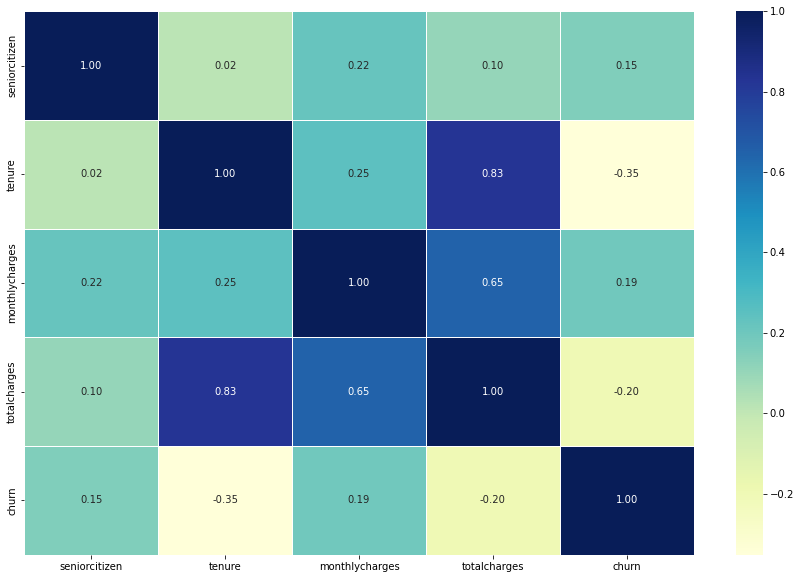

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, 
            linewidths=0.5, 
            fmt= ".2f", cmap="YlGnBu");

## One-hot encoding
To convert categorical variables into numerical for training the model

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [35]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [36]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [37]:
X_train = dv.transform(train_dict)

In [38]:
X_train.shape

(4225, 45)

In [39]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Training logistic regression

In [40]:
# Fit model to training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_train)[:, 1]
# churn = y_pred > 0.5

LogisticRegression(random_state=1, solver='liblinear')

In [41]:
# Apply OHE to validation set, and make predictions
val_dict = df_val[categorical + numerical].to_dict(orient='records') 
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)

In [42]:
y_pred

array([[0.77304767, 0.22695233],
       [0.76423829, 0.23576171],
       [0.71897969, 0.28102031],
       ...,
       [0.99794751, 0.00205249],
       [0.87401645, 0.12598355],
       [0.99881945, 0.00118055]])

In [43]:
# select all rows of second column
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.22695233, 0.23576171, 0.28102031, ..., 0.00205249, 0.12598355,
       0.00118055])

In [44]:
churn = y_pred >= 0.5

In [45]:
(y_val == churn).mean()

0.801277501774308

We are getting 80.12% accuracy on our validation set.

### Model evaluation


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [47]:
print(confusion_matrix(y_val, churn,normalize='all'))

[[0.6515259 0.0887154]
 [0.1100071 0.1497516]]


* TN = 65.2 %
* TP = 14.9%
* FP = 8.9%
* FN = 11%

In [48]:
print(classification_report(y_val,churn))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1043
           1       0.63      0.58      0.60       366

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



The goal of our project is to identify customers who are likely to churn. Once
we do, we can send them promotional messages in the hopes that they’ll change
their mind.  When doing this, we make two types of mistakes:
* We accidentally send messages to people who weren’t going to churn — these
people are the false positives of the model.
* We also sometimes fail to identify people who are actually going to churn. We
don’t send messages to these people — they are our false negatives.

We want to eliminate False positive and False negatives.
*  Precision helps us understand how many people received a promotional message by mistake. The better the precision, the fewer false positives we have. The precision of 63% means that 62% of the reached customers indeed were going to churn (our
true positives), whereas the remaining 37% were not (false positives).
* Recall helps us understand how many of the churning customers we failed to find. The better the recall, the fewer false negatives we have. The recall of 58% means that we reach only 58% of all churning users (true positives) and fail to identify the
remaining 42% (false negatives).

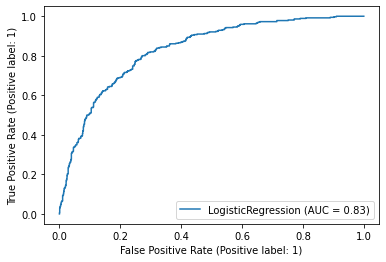

In [49]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay


# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(model, X_val, y_val);

In [50]:
print(confusion_matrix(y_val, churn,normalize='true'))

[[0.8801534  0.1198466 ]
 [0.42349727 0.57650273]]


* FPR = 12 %
* TPR = ~58%

### Hyperparameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [52]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
rs_log_reg.score(X_val, y_val)

0.7934705464868701

In [54]:
y_pred = rs_log_reg.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(y_val == churn).mean()

0.7934705464868701

In [55]:
print(classification_report(y_val,churn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1043
           1       0.62      0.55      0.58       366

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [56]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=10,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)
gs_log_reg.score(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


0.8061538461538461

In [57]:
y_pred = gs_log_reg.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(y_val == churn).mean()

0.7934705464868701

In [58]:
print(classification_report(y_val,churn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1043
           1       0.62      0.55      0.58       366

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



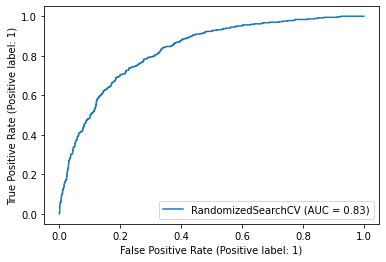

In [59]:
RocCurveDisplay.from_estimator(rs_log_reg, X_val, y_val);

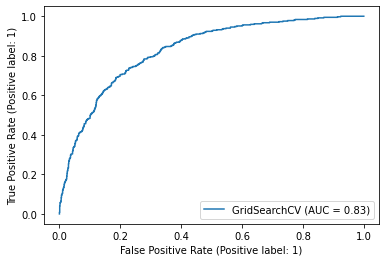

In [60]:
RocCurveDisplay.from_estimator(gs_log_reg, X_val, y_val);

## Model interpretation

In [61]:
# get bias term
model.intercept_[0]

-0.13329165739850446

In [62]:
#check weights for each feature
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.625,
 'contract=one_year': -0.134,
 'contract=two_year': -0.625,
 'dependents=no': -0.009,
 'dependents=yes': -0.124,
 'deviceprotection=no': 0.076,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.093,
 'gender=female': -0.029,
 'gender=male': -0.104,
 'internetservice=dsl': -0.363,
 'internetservice=fiber_optic': 0.346,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.177,
 'multiplelines=no_phone_service': 0.113,
 'multiplelines=yes': -0.069,
 'onlinebackup=no': 0.111,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.127,
 'onlinesecurity=no': 0.245,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.262,
 'paperlessbilling=no': -0.216,
 'paperlessbilling=yes': 0.082,
 'partner=no': -0.076,
 'partner=yes': -0.057,
 'paymentmethod=bank_transfer_(automatic)': -0.051,
 'paymentmethod=credit_card_(automatic)': -0.114,
 'paymentmethod=electronic_check': 0.18

In [63]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [64]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [65]:
model_small.intercept_[0]

-0.6824114898278256

In [66]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.941,
 'contract=one_year': -0.206,
 'contract=two_year': -1.418,
 'tenure': -0.094,
 'totalcharges': 0.001}

In [67]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [68]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

## Using the model

In [69]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [70]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.06171194852908616

In [71]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [72]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [73]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8262012638519721

### Saving the model

In [74]:
import pickle
with open('churn-model.bin', 'wb') as f_out: 
    pickle.dump((dv,model), f_out) 

In [75]:
# #open file in read mode
# with open('churn-model.bin', 'rb') as f_in:
#     dv, model = pickle.load(f_in) 

### Model serving

In [76]:
import requests
url = 'http://localhost:9696/predict' 
response = requests.post(url, json=customer) 
result = response.json()
result

{'churn': True, 'churn_probability': 0.8262012638519721}